In [62]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn import mixture

In [121]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

POLITICIAN = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY]
NEWS_AGENCY = [CNN, BBC, FOXNEWS, REUTERS]
SPROTS_STAR = [LEOMESSI, CRISTIANO_RONALDO, ROGER_FEDERER, RAFAEL_NADAL]


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, 
                  BBC, CNN, FOXNEWS, REUTERS, 
                  LEOMESSI, CRISTIANO_RONALDO, RAFAEL_NADAL, ROGER_FEDERER ]

# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
df = pd.read_excel('../Similarity/dataset_impersonator_with_all.xlsx')
print(df.shape[0])

3832


In [65]:
df.columns

Index(['owener_id', 'combined_username', 'combined_full_name',
       'combined_biography', 'combined_profile_pic_url',
       'combined_profile_pic', 'combined_follower', 'combined_followee',
       'combined_mediacount', 'combined_owener_external_url',
       'combined_is_verified', 'combined_is_private', 'comment_db_id',
       'comment_id', 'comment_created_at', 'comment_post_shortcode',
       'comment_shortcode_username', 'comment_text', 'like_id',
       'like_post_shortcode', 'like_shortcode_username',
       'combined_similarity_username', 'combined_similarity_full_name',
       'combined_similarity_biography', 'comment_total', 'like_total',
       'combined_similarity_photo_comment', 'combined_similarity_photo_like'],
      dtype='object')

In [66]:
df['combined_similarity_photo_like'].fillna("--", inplace=True)
df['combined_similarity_photo_comment'].fillna("--", inplace=True)


df['comment_db_id'].fillna("--", inplace=True)
df['comment_id'].fillna("--", inplace=True)
df['comment_created_at'].fillna("--", inplace=True)
df['comment_post_shortcode'].fillna("--", inplace=True)
df['comment_shortcode_username'].fillna("--", inplace=True)
df['comment_text'].fillna("--", inplace=True)
df['combined_similarity_photo_comment'].fillna("--", inplace=True)



df['like_id'].fillna("--", inplace=True)
df['like_post_shortcode'].fillna("--", inplace=True)
df['like_shortcode_username'].fillna("--", inplace=True)
df['combined_similarity_photo_like'].fillna("--", inplace=True)

In [67]:
def convert_to_list(_row):

    converted_list = []
    if (not _row['comment_db_id'] == "--"):
        converted_list = _row['comment_db_id'].split(",,,")
    _row['comment_db_id'] = converted_list
    
    
    converted_list = []
    if (not _row['comment_id'] == "--"):
        converted_list = _row['comment_id'].split(",,,")
    _row['comment_id'] = converted_list
    
    converted_list = []
    if (not _row['comment_created_at'] == "--"):
        converted_list = _row['comment_created_at'].split(",,,")
    _row['comment_created_at'] = converted_list
    
    converted_list = []
    if (not _row['comment_post_shortcode'] == "--"):
        converted_list = _row['comment_post_shortcode'].split(",,,")
    _row['comment_post_shortcode'] = converted_list
    
    converted_list = []
    if (not _row['comment_shortcode_username'] == "--"):
        converted_list = _row['comment_shortcode_username'].split(",,,")
    _row['comment_shortcode_username'] = converted_list
    
    converted_list = []
    if (not _row['comment_text'] == "--"):
        converted_list = _row['comment_text'].split(",,,")
    _row['comment_text'] = converted_list
    
    converted_list = []
    if (not _row['combined_similarity_photo_comment'] == "--"):
        converted_list = _row['combined_similarity_photo_comment'].split(",,,")
    _row['combined_similarity_photo_comment'] = converted_list
    
    
    
    
    converted_list = []
    if (not _row['like_id'] == "--"):
        converted_list = _row['like_id'].split(",,,")
    _row['like_id'] = converted_list
    
    converted_list = []
    if (not _row['like_post_shortcode'] == "--"):
        converted_list = _row['like_post_shortcode'].split(",,,")
    _row['like_post_shortcode'] = converted_list
    
    converted_list = []
    if (not _row['like_shortcode_username'] == "--"):
        converted_list = _row['like_shortcode_username'].split(",,,")
    _row['like_shortcode_username'] = converted_list
    
    converted_list = []
    if (not _row['combined_similarity_photo_like'] == "--"):
        converted_list = _row['combined_similarity_photo_like'].split(",,,")
    _row['combined_similarity_photo_like'] = converted_list
    
    
    return _row

df = df.apply(convert_to_list, axis=1)

In [68]:
def get_row_data_comment(_row, _id):
    
    tt = _row.iloc[0]

    _row['comment_db_id'] = tt['comment_db_id'][_id]
    _row['comment_id'] = tt['comment_id'][_id]
    _row['comment_created_at'] = tt['comment_created_at'][_id]
    _row['comment_post_shortcode'] = tt['comment_post_shortcode'][_id]
    _row['comment_shortcode_username'] = tt['comment_shortcode_username'][_id]
    _row['comment_text'] = tt['comment_text'][_id]
    _row['combined_similarity_photo_comment'] = tt['combined_similarity_photo_comment'][_id]

    return _row

In [69]:
def get_row_data_like(_row, _id):
    
    tt = _row.iloc[0]
    _row['like_id'] = tt['like_id'][_id]
    _row['like_post_shortcode'] = tt['like_post_shortcode'][_id]
    _row['like_shortcode_username'] = tt['like_shortcode_username'][_id]
    return _row

In [86]:
# df of all users reacted as the shape of like & comment

#politicians
df_trump = df[0:0]
df_like_trump = df[0:0]
df_comment_trump = df[0:0]

df_obama = df[0:0]
df_like_obama = df[0:0]
df_comment_obama = df[0:0]

df_macron = df[0:0]
df_like_macron = df[0:0]
df_comment_macron = df[0:0]

df_may = df[0:0]
df_like_may = df[0:0]
df_comment_may = df[0:0]

#news agencies
df_bbc = df[0:0]
df_like_bbc = df[0:0]
df_comment_bbc = df[0:0]

df_cnn = df[0:0]
df_like_cnn = df[0:0]
df_comment_cnn = df[0:0]

df_foxnews = df[0:0]
df_like_foxnews = df[0:0]
df_comment_foxnews = df[0:0]

df_reuters = df[0:0]
df_like_reuters = df[0:0]
df_comment_reuters = df[0:0]

#sports star
df_messi = df[0:0]
df_like_messi = df[0:0]
df_comment_messi = df[0:0]

df_ronaldo = df[0:0]
df_like_ronaldo = df[0:0]
df_comment_ronaldo = df[0:0]

df_nadal = df[0:0]
df_like_nadal = df[0:0]
df_comment_nadal = df[0:0]

df_federer = df[0:0]
df_like_federer = df[0:0]
df_comment_federer = df[0:0]



for index, row in df.iterrows():
    
    #comment
    if (len(row['comment_shortcode_username']) > 0 ):
        for j in range(len(row['comment_shortcode_username'])):
            _name = row['comment_shortcode_username']
            
            #politicians
            if (_name[j] == DONALD_TRUMP):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_trump = pd.concat([df_comment_trump, df_row])

            if (_name[j] == BARACK_OBAMA):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_obama = pd.concat([df_comment_obama, df_row])
                
            if (_name[j] == EMMANUEL_MACRON):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_macron = pd.concat([df_comment_macron, df_row])
                
            if (_name[j] == THERESA_MAY):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_may = pd.concat([df_comment_may, df_row])
                
                
            # news agencies
            if (_name[j] == BBC):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_bbc = pd.concat([df_comment_bbc, df_row])
                
            if (_name[j] == CNN):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_cnn = pd.concat([df_comment_cnn, df_row])
                
            if (_name[j] == FOXNEWS):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_foxnews = pd.concat([df_comment_foxnews, df_row])
                
            if (_name[j] == REUTERS):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_reuters = pd.concat([df_comment_reuters, df_row])
                
                
            # sports star
            if (_name[j] == LEOMESSI):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_messi = pd.concat([df_comment_messi, df_row])
                
            if (_name[j] == CRISTIANO_RONALDO):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_ronaldo = pd.concat([df_comment_ronaldo, df_row])
                
            if (_name[j] == RAFAEL_NADAL):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_nadal = pd.concat([df_comment_nadal, df_row])
                
            if (_name[j] == ROGER_FEDERER):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_comment(df_row , j)
                df_comment_federer = pd.concat([df_comment_federer, df_row])
                
                
    #like
    if (len(row['like_shortcode_username']) > 0 ):
        for j in range(len(row['like_shortcode_username'])):
            _name = row['like_shortcode_username']
            
            #politicians
            if (_name[j] == DONALD_TRUMP):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_trump = pd.concat([df_like_trump, df_row])

            if (_name[j] == BARACK_OBAMA):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_obama = pd.concat([df_like_obama, df_row])
                
            if (_name[j] == EMMANUEL_MACRON):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_macron = pd.concat([df_like_macron, df_row])
                
            if (_name[j] == THERESA_MAY):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_may = pd.concat([df_like_may, df_row])
                
                
            #news agencies
            if (_name[j] == BBC):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_bbc = pd.concat([df_like_bbc, df_row])

            if (_name[j] == CNN):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_cnn = pd.concat([df_like_cnn, df_row])
                
            if (_name[j] == FOXNEWS):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_foxnews = pd.concat([df_like_foxnews, df_row])
                
            if (_name[j] == REUTERS):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_reuters = pd.concat([df_like_reuters, df_row])
                
                
            #sports star
            if (_name[j] == LEOMESSI):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_messi = pd.concat([df_like_messi, df_row])

            if (_name[j] == CRISTIANO_RONALDO):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_ronaldo = pd.concat([df_like_ronaldo, df_row])
                
            if (_name[j] == RAFAEL_NADAL):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_nadal = pd.concat([df_like_nadal, df_row])
                
            if (_name[j] == ROGER_FEDERER):
                df_row = df.loc[df['owener_id'] == row['owener_id']]
                df_row = get_row_data_like(df_row , j)
                df_like_federer = pd.concat([df_like_federer, df_row])
                
                


/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [87]:
# df of all users reacted in each usecase

#politicians
df_trump = pd.concat([df_comment_trump, df_like_trump])
df_obama = pd.concat([df_comment_obama, df_like_obama])
df_macron = pd.concat([df_comment_macron, df_like_macron])
df_may = pd.concat([df_comment_may, df_like_may])

#News agencies
df_bbc = pd.concat([df_comment_bbc, df_like_bbc])
df_cnn = pd.concat([df_comment_cnn, df_like_cnn])
df_foxnews = pd.concat([df_comment_foxnews, df_like_foxnews])
df_reuters = pd.concat([df_comment_reuters, df_like_reuters])

#Sports star
df_messi = pd.concat([df_comment_messi, df_like_messi])
df_ronaldo = pd.concat([df_comment_ronaldo, df_like_ronaldo])
df_nadal = pd.concat([df_comment_nadal, df_like_nadal])
df_federer = pd.concat([df_comment_federer, df_like_federer])

In [149]:
#separated comment & lik dataframes
print("trump t comment: " + str(df_comment_trump.shape[0]) + " | t like: " + str(df_like_trump.shape[0]))
print("obama t comment: " + str(df_comment_obama.shape[0]) + " | t like: " + str(df_like_obama.shape[0]))
print("macron t comment: " + str(df_comment_macron.shape[0]) + " | t like: " + str(df_like_macron.shape[0]))
print("may t comment: " + str(df_comment_may.shape[0]) + " | t like: " + str(df_like_may.shape[0]))
print("ronaldo t comment: " + str(df_comment_ronaldo.shape[0]) + " | t like: " + str(df_like_ronaldo.shape[0]))

trump t comment: 240 | t like: 182
obama t comment: 30 | t like: 28
macron t comment: 13 | t like: 97
may t comment: 45 | t like: 109
ronaldo t comment: 3372 | t like: 1478


In [73]:
def get_unique_post_count(_df_comment, _df_like):
    
    comment = pd.unique(_df_comment['comment_post_shortcode']).tolist()
    like = pd.unique(_df_like['like_post_shortcode']).tolist()
    list_all = []
    list_all.extend(like)
    list_all.extend(comment)

    return list_all

In [90]:
#unique post count

#politicians
list_shortcode_trump = get_unique_post_count(df_comment_trump, df_like_trump)
list_shortcode_obama = get_unique_post_count(df_comment_obama, df_like_obama)
list_shortcode_macron = get_unique_post_count(df_comment_macron, df_like_macron)
list_shortcode_may = get_unique_post_count(df_comment_may, df_like_may)
print(len(list_shortcode_trump))
print(len(list_shortcode_obama))
print(len(list_shortcode_macron))
print(len(list_shortcode_may))

#news agencies
list_shortcode_bbc = get_unique_post_count(df_comment_bbc, df_like_bbc)
list_shortcode_cnn = get_unique_post_count(df_comment_cnn, df_like_cnn)
list_shortcode_foxnews = get_unique_post_count(df_comment_foxnews, df_like_foxnews)
list_shortcode_reuters = get_unique_post_count(df_comment_reuters, df_like_reuters)
print(len(list_shortcode_cnn))


#sports star
list_shortcode_messi = get_unique_post_count(df_comment_messi, df_like_messi)
list_shortcode_ronaldo = get_unique_post_count(df_comment_ronaldo, df_like_ronaldo)
list_shortcode_nadal = get_unique_post_count(df_comment_nadal, df_like_nadal)
list_shortcode_federer = get_unique_post_count(df_comment_federer, df_like_federer)


51
10
25
89
0


In [110]:
# get average like & comment per each usecase
# (number of total like (comment) / unique count of posts)

#Politicians
list_like_politicians = []
list_comment_politicians = []



t = df_like_trump.shape[0] / len(list_shortcode_trump)
print("trume like: " + str(t))
list_like_politicians.append(t)

t = df_comment_trump.shape[0] / len(list_shortcode_trump)
print("trume comment: " + str( t ))
list_comment_politicians.append(t)

t = df_like_obama.shape[0] / len(list_shortcode_obama)
print("obama like: " + str( t ))
list_like_politicians.append(t)

t = df_comment_obama.shape[0] / len(list_shortcode_obama)
print("obama comment: " + str( t ))
list_comment_politicians.append(t)

t = df_like_macron.shape[0] / len(list_shortcode_macron)
print("macron like: " + str( t ))
list_like_politicians.append(t)

t = df_comment_macron.shape[0] / len(list_shortcode_macron)
print("macron comment: " + str( t ))
list_comment_politicians.append(t)

t = df_like_may.shape[0] / len(list_shortcode_may)
print("may like: " + str( t ))
list_like_politicians.append(t)

t = df_comment_may.shape[0] / len(list_shortcode_may)
print("may comment: " + str( t ))
list_comment_politicians.append(t)

trume like: 3.5686274509803924
trume comment: 4.705882352941177
obama like: 2.8
obama comment: 3.0
macron like: 3.88
macron comment: 0.52
may like: 1.2247191011235956
may comment: 0.5056179775280899


In [111]:
#News agencies

list_comment_newsagencies = []
list_like_newsagencies = []

t = df_like_bbc.shape[0] / len(list_shortcode_bbc)
print("bbc like: " + str( t ))
list_like_newsagencies.append(t)

t = df_comment_bbc.shape[0] / len(list_shortcode_bbc)
print("bbc comment: " + str( t ))
list_comment_newsagencies.append(t)

t = df_like_cnn.shape[0] / len(list_shortcode_cnn) if len(list_shortcode_cnn) != 0 else 0
print("cnn like: " + str( t ))
list_like_newsagencies.append(t)

t = df_comment_cnn.shape[0] / len(list_shortcode_cnn)  if len(list_shortcode_cnn) != 0 else 0
print("cnn comment: " + str(  ))
list_comment_newsagencies.append(t)

t = df_like_foxnews.shape[0] / len(list_shortcode_foxnews)
print("foxnews like: " + str( t ))
list_like_newsagencies.append(t)

t = df_comment_foxnews.shape[0] / len(list_shortcode_foxnews)
print("foxnews comment: " + str( t ))
list_comment_newsagencies.append(t)

t = df_like_reuters.shape[0] / len(list_shortcode_reuters)
print("reuters like: " + str( t ))
list_like_newsagencies.append(t)

t = df_comment_reuters.shape[0] / len(list_shortcode_reuters)
print("reuters comment: " + str( t ))
list_comment_newsagencies.append(t)

bbc like: 0.4
bbc comment: 0.8
cnn like: 0
cnn comment: 
foxnews like: 1.4285714285714286
foxnews comment: 2.142857142857143
reuters like: 4.5
reuters comment: 0.25


In [118]:
#Sports stars

list_comment_sports = []
list_like_sports = []

t = df_like_messi.shape[0] / len(list_shortcode_messi)
print("messi like: " + str( t ))
list_like_sports.append(t)

t = df_comment_messi.shape[0] / len(list_shortcode_messi)
print("messi comment: " + str( t ))
list_comment_sports.append(t)

t = df_like_ronaldo.shape[0] / len(list_shortcode_ronaldo)
print("ronalod like: " + str( t))
list_like_sports.append(t)

t = df_comment_ronaldo.shape[0] / len(list_shortcode_ronaldo)
print("ronalod comment: " + str( t))
list_comment_sports.append(t)

t = df_like_nadal.shape[0] / len(list_shortcode_nadal)
print("nadal like: " + str( t ))
list_like_sports.append(t)

t = df_comment_nadal.shape[0] / len(list_shortcode_nadal)
print("nadal comment: " + str( t ))
list_comment_sports.append(t)

t = df_like_federer.shape[0] / len(list_shortcode_federer)
print("federer like: " + str( t ))
list_like_sports.append(t)

t = df_comment_federer.shape[0] / len(list_shortcode_federer)
print("federer comment: " + str( t ))
list_comment_sports.append(t)


messi like: 18.7
messi comment: 82.1
ronalod like: 164.22222222222223
ronalod comment: 374.6666666666667
nadal like: 22.928571428571427
nadal comment: 7.5
federer like: 27.666666666666668
federer comment: 28.833333333333332


In [119]:
# #remove duplicates
# df_comment_trump = df_comment_trump.drop_duplicates(subset='owener_id', keep='first')
# df_comment_obama = df_comment_obama.drop_duplicates(subset='owener_id', keep='first')
# df_comment_macron = df_comment_macron.drop_duplicates(subset='owener_id', keep='first')
# df_comment_may = df_comment_may.drop_duplicates(subset='owener_id', keep='first')

# df_like_trump = df_like_trump.drop_duplicates(subset='owener_id', keep='first')
# df_like_obama = df_like_obama.drop_duplicates(subset='owener_id', keep='first')
# df_like_macron = df_like_macron.drop_duplicates(subset='owener_id', keep='first')
# df_like_may = df_like_may.drop_duplicates(subset='owener_id', keep='first')

In [120]:
list_like_all = []
list_comment_all = []

list_like_all.extend(list_like_politicians)
list_like_all.extend(list_like_newsagencies)
list_like_all.extend(list_like_sports)

list_comment_all.extend(list_comment_politicians)
list_comment_all.extend(list_comment_newsagencies)
list_comment_all.extend(list_comment_sports)

In [153]:
df_impersonator_detail = pd.DataFrame({'avg like': list_like_all, 'avg comment': list_comment_all}, index=LIST_ALL_USERS)
df_impersonator_detail

avg like  avg comment
realdonaldtrump    3.568627     4.705882
barackobama        2.800000     3.000000
emmanuelmacron     3.880000     0.520000
theresamay         1.224719     0.505618
bbcnews            0.400000     0.800000
cnn                0.000000     0.000000
foxnews            1.428571     2.142857
reuters            4.500000     0.250000
leomessi          18.700000    82.100000
cristiano        164.222222   374.666667
rafaelnadal       22.928571     7.500000
rogerfederer      27.666667    28.833333

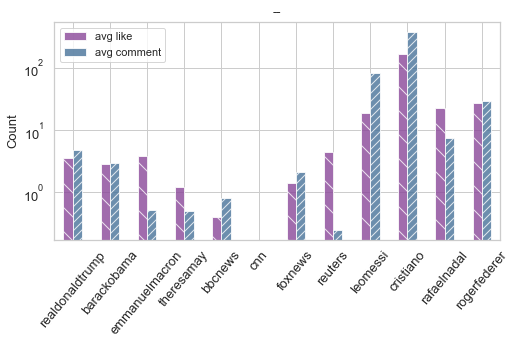

In [159]:
def plot_1():
    
    sns.set(style="whitegrid")
    fig, (ax1) = plt.subplots(1,1, figsize=(8,4))

    ax1 = df_impersonator_detail.plot.bar(rot=50, ax=ax1, color=['#8a4799', '#477299'], alpha= 0.8)
#     ax1.set_xlabel("")
    ax1.set_ylabel("Count")
    ax1.set_yscale('log')
    ax1.set_title("--")
    
    bars = ax1.patches
    patterns =('\\','///')
    hatches = [p for p in patterns for i in range(len(df_impersonator_detail))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
        
    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()): item.set_fontsize(13)
    
    plt.savefig("plot_MLearning10_P1.pdf", bbox_inches='tight')
    
plot_1()